In [40]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
import requests
import pickle
import re
pd.set_option('display.max_columns', None)

### Download Stock Data

In [46]:

stock_period = ('2010/01/01','2022/12/31')
stock_list = ['^TWII','0050','NFLX','^GSPC']

for stock in stock_list: 
    try:
        print(f'Start Download {stock}')
        # if stock != '^TWII':
        if stock not in ['^TWII','^GSPC','NFLX']:
            stock = stock+'.TW'
        df = pdr.DataReader(stock, 'yahoo', start=stock_period[0], end=stock_period[1])
        stock = re.sub('\^|.TW', '', stock)
        output_path = os.path.join('data',f'{stock}.csv')
        df = df.dropna()
        print(f'save data to {output_path}')
        df.to_csv(output_path)
        # df.head()
    except:
        print(f'  {stock} Download Fail')

df.head() 


Start Download ^TWII
  ^TWII.TW Download Fail
Start Download 0050
save data to data\0050.csv
Start Download NFLX
save data to data\NFLX.csv
Start Download ^GSPC
save data to data\GSPC.csv


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,1127.640015,1114.810059,1126.599976,1115.099976,2076990000,1115.099976
2010-01-04,1133.869995,1116.560059,1116.560059,1132.989990,3991400000,1132.989990
2010-01-05,1136.630005,1129.660034,1132.660034,1136.520020,2491020000,1136.520020
2010-01-06,1139.189941,1133.949951,1135.709961,1137.140015,4972660000,1137.140015
2010-01-07,1142.459961,1131.319946,1136.270020,1141.689941,5270680000,1141.689941


In [42]:

display(df.head()),display(df.tail())

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,8.011429,7.864286,7.947143,7.870000,5291300.0,7.870000
2010-01-04,7.961429,7.565714,7.931429,7.640000,17239600.0,7.640000
2010-01-05,7.657143,7.258571,7.652857,7.358571,23753100.0,7.358571
2010-01-06,7.672857,7.197143,7.361429,7.617143,23290400.0,7.617143
2010-01-07,7.757143,7.462857,7.731429,7.485714,9955400.0,7.485714


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-09-30,242.440002,233.259995,237.000000,235.440002,11841700.0,235.440002
2022-10-03,241.539993,232.850006,237.850006,239.039993,8657400.0,239.039993
2022-10-04,245.800003,233.250000,244.839996,240.740005,13925900.0,240.740005
2022-10-05,241.589996,227.380005,238.759995,236.729996,10814500.0,236.729996
2022-10-06,240.410004,233.979996,236.679993,238.914993,3394810.0,238.914993


(None, None)

### Split Data to Train & Test

In [47]:

stock = 'GSPC'
# train_year = ('2015','2019')
# test_year = ('2020','2021')
train_year = ('2010','2021')
test_year = ('2021','2022')
data = pd.read_csv(f'data/{stock}.csv',index_col=0)
# data = pd.DataFrame(data, index = data.index, columns = data.columns)

# create train set
train = data.loc[f'{train_year[0]}0101':f'{train_year[1]}1231']
output_path = f'data/{stock}_train.csv'
print('Train Data:',output_path)
train.to_csv(output_path)

# create scaler 
scalerfile = f'scaler/{stock}_train_scaler.sav'
print('Scaler File:',scalerfile)
scaler_ = StandardScaler()
scaler = scaler_.fit(train)
pickle.dump(scaler, open(scalerfile, 'wb'))
# scaler = pickle.load(open(scalerfile, 'rb'))

# create scaler 
# test = data.loc[f'{test_year[0]}0101':f'{test_year[1]}1231']
print(f'{test_year[0]}0101',f'{test_year[1]}0831')
test = data.loc[f'{test_year[0]}0101':f'{test_year[1]}0831']
output_path = f'data/{stock}_test.csv'
print('Test Data:',output_path)
test.to_csv(output_path)

display(train.head())
display(test.head())

Train Data: data/GSPC_train.csv
Scaler File: scaler/GSPC_train_scaler.sav
20210101 20220831
Test Data: data/GSPC_test.csv


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,1276.170044,1257.619995,1257.619995,1271.869995,4286670000,1271.869995
2011-01-04,1274.119995,1262.660034,1272.949951,1270.199951,4796420000,1270.199951
2011-01-05,1277.630005,1265.359985,1268.780029,1276.560059,4764920000,1276.560059
2011-01-06,1278.170044,1270.430054,1276.290039,1273.849976,4844100000,1273.849976
2011-01-07,1276.829956,1261.699951,1274.410034,1271.500000,4963110000,1271.500000


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-03,4796.640137,4758.169922,4778.140137,4796.560059,2775190000,4796.560059
2022-01-04,4818.620117,4774.270020,4804.509766,4793.540039,3641050000,4793.540039
2022-01-05,4797.700195,4699.439941,4787.990234,4700.580078,3733540000,4700.580078
2022-01-06,4725.009766,4671.259766,4693.390137,4696.049805,3371250000,4696.049805
2022-01-07,4707.950195,4662.740234,4697.660156,4677.029785,3279870000,4677.029785


In [48]:
display(data.tail())
data.loc['20220101':'20220831']


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-09-30,3671.439941,3584.129883,3633.479980,3585.620117,5645360000,3585.620117
2022-10-03,3698.350098,3604.929932,3609.780029,3678.429932,4806680000,3678.429932
2022-10-04,3791.919922,3726.459961,3726.459961,3790.929932,5146580000,3790.929932
2022-10-05,3806.909912,3722.659912,3753.250000,3783.280029,4293180000,3783.280029
2022-10-06,3797.929932,3746.580078,3771.969971,3768.550049,932983403,3768.550049


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,


### Plot Train & Test 

Text(0.5, 1.0, 'observe dataset')

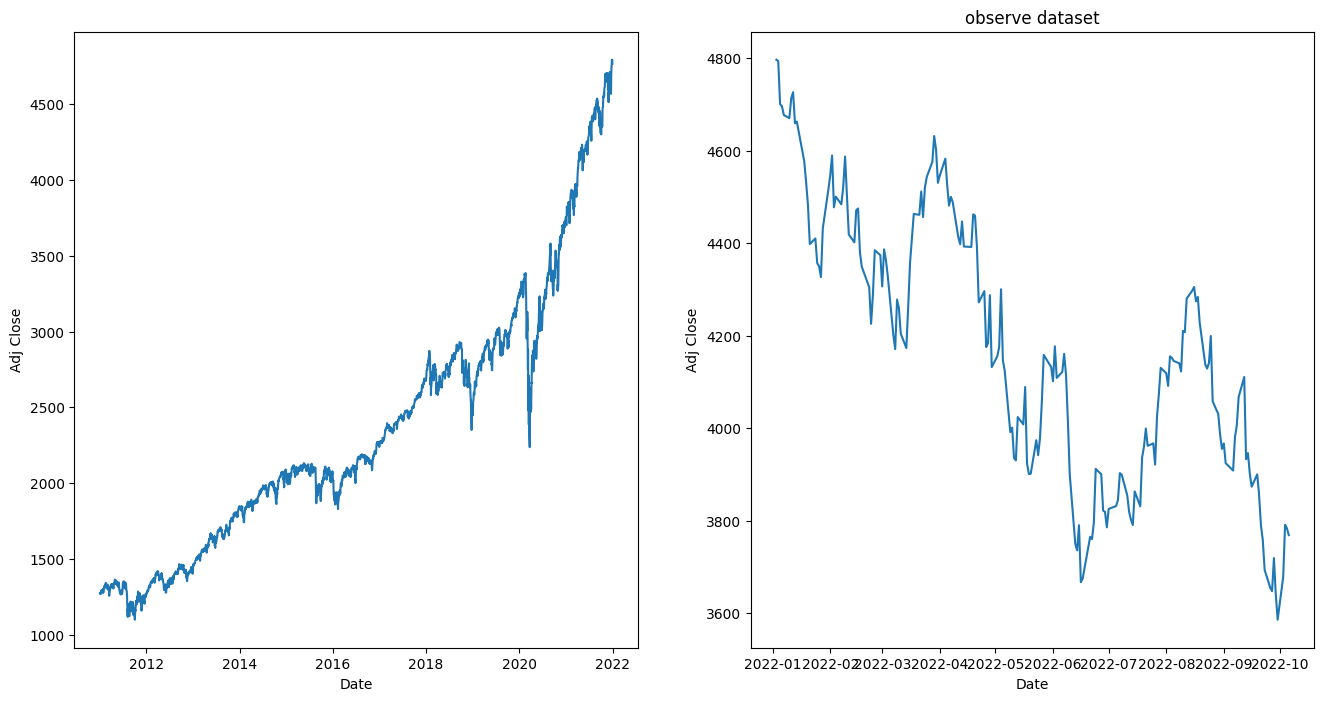

In [49]:
train.index = pd.to_datetime(train.index,format='%Y-%m-%d')
test.index = pd.to_datetime(test.index,format='%Y-%m-%d')
# y_max = max(max(train.apply(max)),max(test.apply(max)))
# y_max = y_max+y_max*0.1
fig, ax = plt.subplots(1, 2, figsize=(16, 8), dpi=100)
sns.lineplot(data=train['Adj Close'],ax=ax[0])
sns.lineplot(data=test['Adj Close'],ax=ax[1])
# ax[0].set_ylim(0,y_max)
# ax[1].set_ylim(0,y_max)
plt.title(f'observe dataset')
# plt.legend(loc='upper left')